## Análise Espacial - MBA em DSA - USP-ESALQ - Prof. Dr. Rafael de Freitas Souza

## Aula 2 - Simple Feature e Spatial Points

## Importando as bibliotecas

In [4]:
pip install rdata

  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import fiona
#import numpy as np
import pyreadr
#import contextily as cx

In [2]:
#No notebook sobre shapefiles, usamos a library pyreadr para ler um RData
shoppings = pyreadr.read_r('shoppings.RData')
shoppings = shoppings['shoppings']
shoppings.tail()

,shopping,endereco,regiao,latitude,longitude
45,Shopping Vila OlÃ­mpia,"Rua Olimpiadas 360 Vila Olimpia 04551000, Sao ...",sul,-23.595464,-46.686785
46,Shopping Villa-Lobos,Avenida das Nacoes Unidas 4777 Alto de Pinheir...,oeste,-23.551094,-46.721819
47,Shopping West Plaza,Avenida Francisco Matarazzo s/n Agua Branca 05...,oeste,-23.526846,-46.674170
48,TietÃª Plaza Shopping,Avenida Raimundo Pereira de Magalhaes 1465 Jar...,noroeste,-23.506537,-46.718478
49,Top Center,"Avenida Paulista 854 Bela Vista 01310913, Sao ...",central,-23.565507,-46.650555


### Veja que com a biblioteca pyreadr tivemos problemas com o encoding, já que ela não permite a definição do mesmo na hora da importação, portanto, vamos usar uma outra biblioteca para importar arquivos RData para o python: a rdata

In [5]:
import rdata

In [6]:
parsed = rdata.parser.parse_file("shoppings.RData")
converted = rdata.conversion.convert(parsed, default_encoding="utf8")
shoppings = pd.DataFrame(converted['shoppings'])

In [7]:
shoppings.tail()

,shopping,endereco,regiao,latitude,longitude
46,Shopping Vila Olímpia,"Rua Olimpiadas 360 Vila Olimpia 04551000, Sao ...",sul,-23.595464,-46.686785
47,Shopping Villa-Lobos,Avenida das Nacoes Unidas 4777 Alto de Pinheir...,oeste,-23.551094,-46.721819
48,Shopping West Plaza,Avenida Francisco Matarazzo s/n Agua Branca 05...,oeste,-23.526846,-46.674170
49,Tietê Plaza Shopping,Avenida Raimundo Pereira de Magalhaes 1465 Jar...,noroeste,-23.506537,-46.718478
50,Top Center,"Avenida Paulista 854 Bela Vista 01310913, Sao ...",central,-23.565507,-46.650555


## Criando um sf a partir de um dataframe
https://geopandas.org/en/latest/gallery/create_geopandas_from_pandas.html

In [8]:
sf_shopping = gpd.GeoDataFrame(
    shoppings, geometry=gpd.points_from_xy(shoppings.longitude, shoppings.latitude, crs=4326))

In [9]:
sf_shopping.head()

,shopping,endereco,regiao,latitude,longitude,geometry
1,Boavista Shopping,"Rua Borba Gato 59 Santo Amaro 04747030, Sao Pa...",sul,-23.654715,-46.700902,POINT (-46.70090 -23.65472)
2,Bourbon Shopping,"Rua Palestra Italia 500 Perdizes 05005030, Sao...",oeste,-23.526550,-46.680817,POINT (-46.68082 -23.52655)
3,Brascan Century Open Mall,"Rua Joaquim Floriano 466 Itaim Bibi 04534002, ...",oeste,-23.584340,-46.675024,POINT (-46.67502 -23.58434)
4,Frei Caneca Shopping,"Rua Frei Caneca 569 Consolacao 01307001, Sao P...",central,-23.554138,-46.652591,POINT (-46.65259 -23.55414)
5,Mais Shopping Largo 13,"Rua Amador Bueno 229 Santo Amaro 04752005, Sao...",sul,-23.653005,-46.710336,POINT (-46.71034 -23.65300)


<AxesSubplot:>

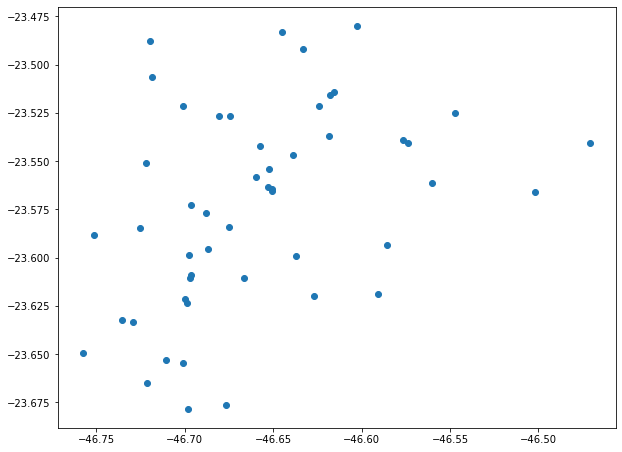

In [10]:
sf_shopping.plot(figsize=(10,10))

In [11]:
#Extraindo o Bounding Box do dataset (xmin, ymin, xmax e ymax)
sf_shopping.total_bounds

array([-46.7575195, -23.6782992, -46.4706416, -23.479872 ])

In [12]:
#Extraindo o CRS do dataset
sf_shopping.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Combinando um objeto simple feature com um shapefile

## Sobrepondo mapas (layers)


In [13]:
shp_saopaulo = gpd.read_file('shapefiles/municipio_sp.shp')

In [14]:
shp_saopaulo.head()

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"POLYGON ((352436.869 7394174.148, 352450.740 7..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"POLYGON ((320696.639 7383620.282, 320699.486 7..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"POLYGON ((349461.276 7397764.525, 349461.935 7..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"POLYGON ((320731.080 7400614.592, 320732.386 7..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"POLYGON ((338651.039 7392203.484, 338654.034 7..."


In [15]:
shp_saopaulo.crs

<Derived Projected CRS: EPSG:29193>
Name: SAD69 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

<AxesSubplot:>

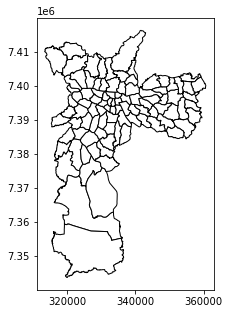

In [16]:
shp_saopaulo.plot(figsize=(5,5), color='white', edgecolor='black')

In [17]:
#Como a geometria do dataset dos shoppings está em graus, é necessário alterar o CRS do shapefile da cidade de SP
shp_saopaulo = shp_saopaulo.to_crs(4326)

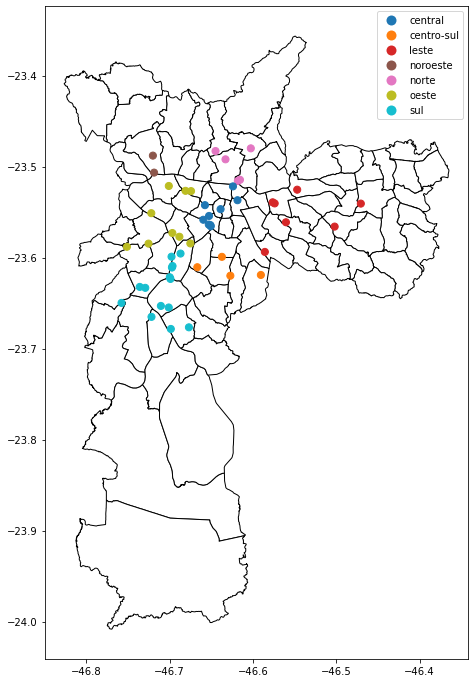

In [18]:
#https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.plot.html
base = shp_saopaulo.plot(color='white', edgecolor='black', figsize = (12,12))
sf_shopping.plot(column = 'regiao', ax=base, marker='o', markersize=50, legend = True);

In [19]:
sf_shopping.explore(legend = False, marker_kwds = {'radius': 10, 'fill': True, 'color': 'green'})

# Buffer Analysis
### O buffering é uma técnica para se medir distâncias para fora de um dado ponto geográfico.
### Referência: https://geopandas.org/en/stable/getting_started/introduction.html?highlight=buffer

In [20]:
#Como a geometria estava em graus, foi necessário alterar o CRS
sf_shopping = sf_shopping.to_crs(22523) #Mesmo CRS usado pelo professor para considerar a distância Euclidiana

In [21]:
sf_shopping.crs

<Derived Projected CRS: EPSG:22523>
Name: Corrego Alegre 1970-72 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore between 48°W and 42°W and south of 15°S.
- bounds: (-48.0, -25.29, -42.0, -15.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Corrego Alegre 1970-72
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

### Diferentemente do R, no Python não é necessário vc transformar um SF em SP para o buffering.

In [22]:
#Aqui é criado um novo feature (coluna) no dataset com os valores do buffering
sf_shopping["buffered"] = sf_shopping.buffer(1500) #usamos a distância dde 1500 metros para o buffering

In [23]:
sf_shopping.head()

,shopping,endereco,regiao,latitude,longitude,geometry,buffered
1,Boavista Shopping,"Rua Borba Gato 59 Santo Amaro 04747030, Sao Pa...",sul,-23.654715,-46.700902,POINT (326550.399 7382975.255),"POLYGON ((328050.399 7382975.255, 328043.176 7..."
2,Bourbon Shopping,"Rua Palestra Italia 500 Perdizes 05005030, Sao...",oeste,-23.526550,-46.680817,POINT (328432.622 7397192.609),"POLYGON ((329932.622 7397192.609, 329925.399 7..."
3,Brascan Century Open Mall,"Rua Joaquim Floriano 466 Itaim Bibi 04534002, ...",oeste,-23.584340,-46.675024,POINT (329098.913 7390799.812),"POLYGON ((330598.913 7390799.812, 330591.690 7..."
4,Frei Caneca Shopping,"Rua Frei Caneca 569 Consolacao 01307001, Sao P...",central,-23.554138,-46.652591,POINT (331349.932 7394170.978),"POLYGON ((332849.932 7394170.978, 332842.709 7..."
5,Mais Shopping Largo 13,"Rua Amador Bueno 229 Santo Amaro 04752005, Sao...",sul,-23.653005,-46.710336,POINT (325585.805 7383153.172),"POLYGON ((327085.805 7383153.172, 327078.583 7..."


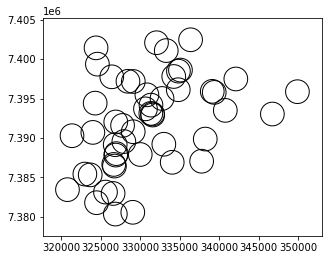

In [24]:
ax = sf_shopping["buffered"].plot(color='none', edgecolor='black', figsize = (5,5))

In [25]:
sf_shopping['buffered'].explore(color = 'black', style_kwds = {'fill': False, 'weight': 1})

## Combinando os objetos shp_saopaulo, sf_shoppings e buffer_shoppings

In [26]:
#Primeiro, vamos ter certeza que o CRS dos dois é o mesmo
shp_saopaulo = shp_saopaulo.to_crs(4326)
sf_shopping = sf_shopping.to_crs(4326)

In [27]:
#Veja que o referencial da coluna buffer criada é em metores, enquanto a geometria está em long/lat.
sf_shopping.head()

,shopping,endereco,regiao,latitude,longitude,geometry,buffered
1,Boavista Shopping,"Rua Borba Gato 59 Santo Amaro 04747030, Sao Pa...",sul,-23.654715,-46.700902,POINT (-46.70090 -23.65472),"POLYGON ((328050.399 7382975.255, 328043.176 7..."
2,Bourbon Shopping,"Rua Palestra Italia 500 Perdizes 05005030, Sao...",oeste,-23.526550,-46.680817,POINT (-46.68082 -23.52655),"POLYGON ((329932.622 7397192.609, 329925.399 7..."
3,Brascan Century Open Mall,"Rua Joaquim Floriano 466 Itaim Bibi 04534002, ...",oeste,-23.584340,-46.675024,POINT (-46.67502 -23.58434),"POLYGON ((330598.913 7390799.812, 330591.690 7..."
4,Frei Caneca Shopping,"Rua Frei Caneca 569 Consolacao 01307001, Sao P...",central,-23.554138,-46.652591,POINT (-46.65259 -23.55414),"POLYGON ((332849.932 7394170.978, 332842.709 7..."
5,Mais Shopping Largo 13,"Rua Amador Bueno 229 Santo Amaro 04752005, Sao...",sul,-23.653005,-46.710336,POINT (-46.71034 -23.65300),"POLYGON ((327085.805 7383153.172, 327078.583 7..."


In [28]:
#Aqui estamos alteranddo o CRS da coluna buffered para o mesmo que vamos usar na plotagem
sf_shopping['buffered'] = sf_shopping['buffered'].to_crs(4326)

Text(0.5, 1.0, 'Shoppings na cidade de São Paulo')

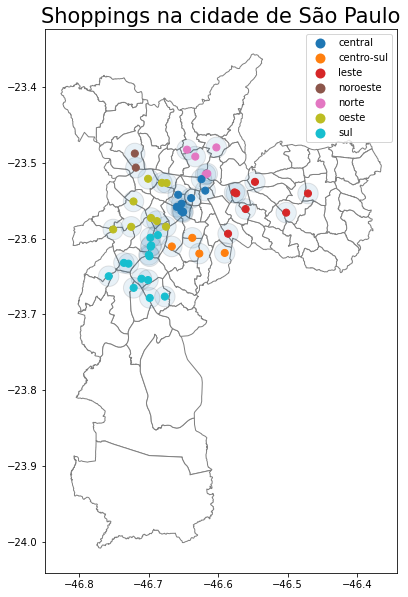

In [29]:
ax = sf_shopping['buffered'].plot(alpha = .1, edgecolor='black', figsize = (10,10))
sf_shopping.plot(column = 'regiao', ax=ax, marker='o', markersize=50, legend = True);
shp_saopaulo.plot(ax = ax, color='white', edgecolor='gray', figsize = (12,12),  zorder = 0)
title = "Shoppings na cidade de São Paulo"
plt.title(title, fontsize=21)